In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
train = pd.read_csv('dataset/dengue_features_train.csv')

In [132]:
train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [133]:
train.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [134]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [135]:
train.shape

(1456, 24)

In [136]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1456.0,2001.031593,5.408314,1990.000000,1997.000000,2002.000000,2005.000000,2010.000000
weekofyear,1456.0,26.503434,15.019437,1.000000,13.750000,26.500000,39.250000,53.000000
ndvi_ne,1262.0,0.142294,0.140531,-0.406250,0.044950,0.128817,0.248483,0.508357
ndvi_nw,1404.0,0.130553,0.119999,-0.456100,0.049217,0.121429,0.216600,0.454429
ndvi_se,1434.0,0.203783,0.073860,-0.015533,0.155087,0.196050,0.248846,0.538314
ndvi_sw,1434.0,0.202305,0.083903,-0.063457,0.144209,0.189450,0.246982,0.546017
precipitation_amt_mm,1443.0,45.760388,43.715537,0.000000,9.800000,38.340000,70.235000,390.600000
reanalysis_air_temp_k,1446.0,298.701852,1.362420,294.635714,297.658929,298.646429,299.833571,302.200000
reanalysis_avg_temp_k,1446.0,299.225578,1.261715,294.892857,298.257143,299.289286,300.207143,302.928571
reanalysis_dew_point_temp_k,1446.0,295.246356,1.527810,289.642857,294.118929,295.640714,296.460000,298.450000


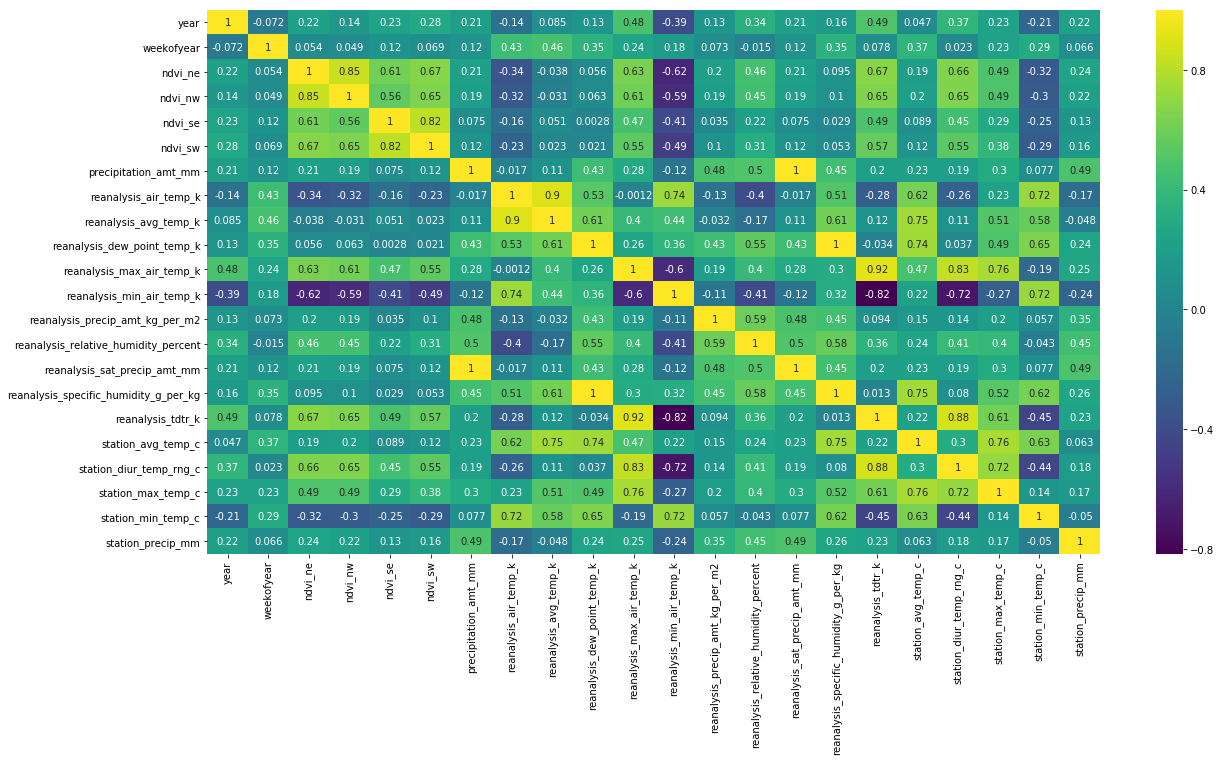

In [137]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),cmap='viridis',annot=True)

In [138]:
labels = pd.read_csv('dataset/dengue_labels_train.csv')

In [139]:
labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [140]:
labels.shape

(1456, 4)

In [225]:
train_labels = pd.merge(train,labels,on=['city','year','weekofyear'],how='inner') 

In [226]:
train_labels['week_start_date'] = pd.to_datetime(train_labels['week_start_date'])

In [227]:
train_labels['month'] = train_labels['week_start_date'].dt.strftime('%m')

In [228]:
train_labels.groupby(['city','year']).sum().total_cases

city  year
iq    2000       4
      2001      14
      2002     704
      2003     114
      2004     638
      2005     311
      2006     436
      2007     365
      2008     801
      2009     324
      2010     223
sj    1990     866
      1991    2801
      1992    2371
      1993    1156
      1994    6533
      1995    1333
      1996     855
      1997    1454
      1998    4595
      1999    1633
      2000     492
      2001    1463
      2002     452
      2003     949
      2004     610
      2005    1805
      2006     550
      2007    1969
      2008     106
Name: total_cases, dtype: int64

In [229]:
total_cases_by_city_and_month = pd.DataFrame(train_labels.groupby(['city','month']).sum().total_cases) 

In [230]:
total_cases_by_city_and_month.reset_index(inplace=True)

In [231]:
total_cases_by_city_and_month

,city,month,total_cases
0,iq,01,604
1,iq,02,503
2,iq,03,290
3,iq,04,285
4,iq,05,194
5,iq,06,135
6,iq,07,153
7,iq,08,126
8,iq,09,277
9,iq,10,458


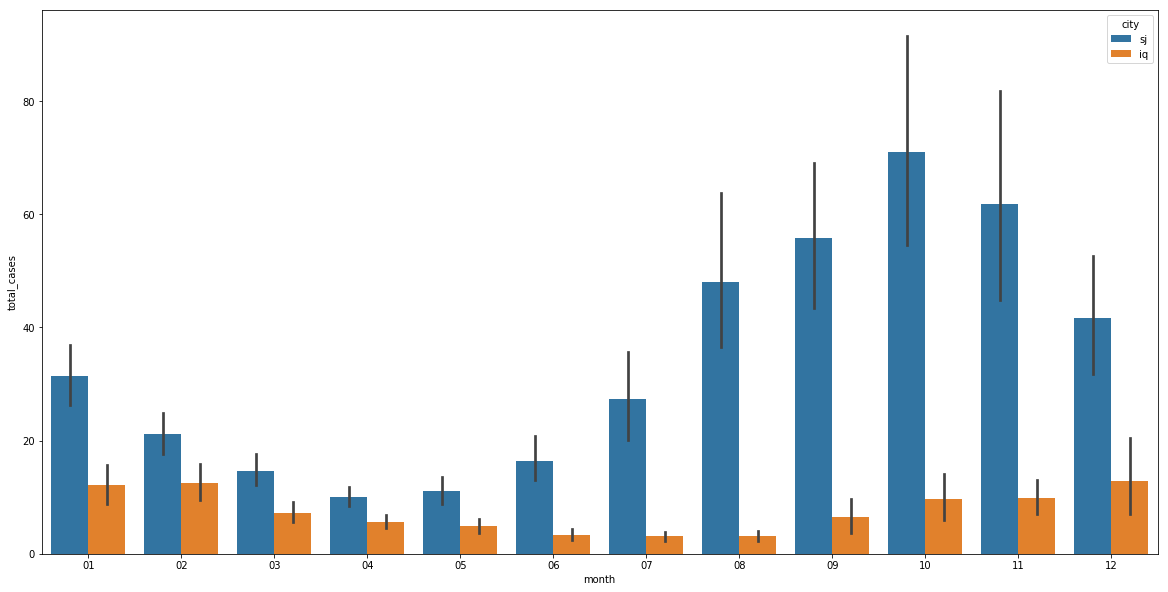

In [232]:
plt.figure(figsize=(20,10))
sns.barplot(train_labels.month,train_labels.total_cases, hue=train_labels.city)

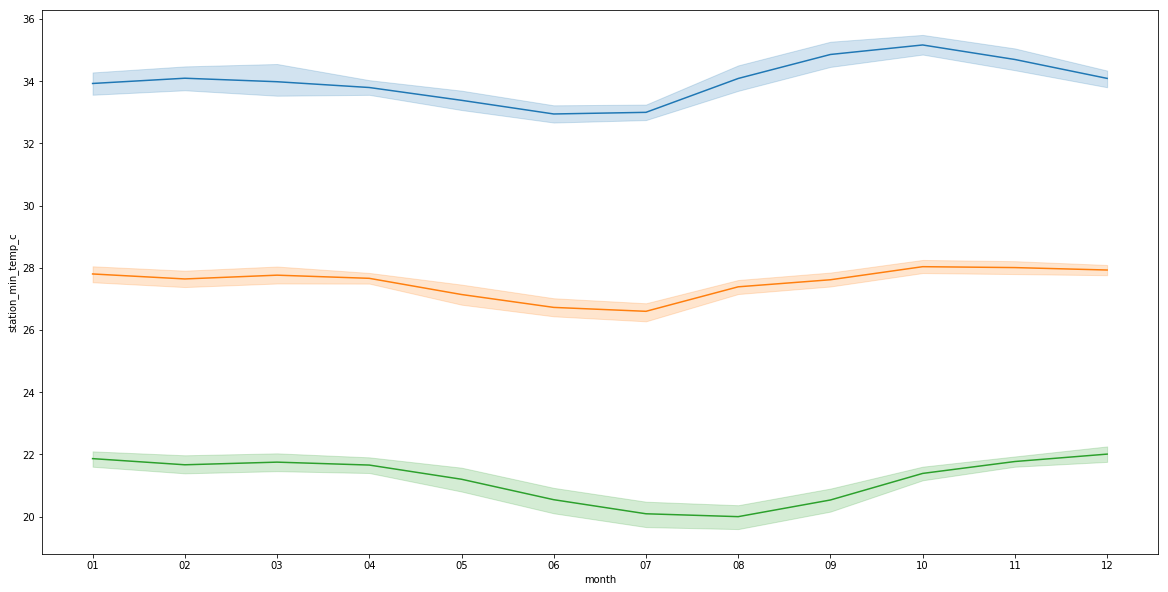

In [176]:
plt.figure(figsize=(20,10))
sns.lineplot(x=train_labels.month,y=train_labels['station_max_temp_c'][train_labels['city']=='iq'])
sns.lineplot(x=train_labels.month,y=train_labels['station_avg_temp_c'][train_labels['city']=='iq'])
sns.lineplot(x=train_labels.month,y=train_labels['station_min_temp_c'][train_labels['city']=='iq'])

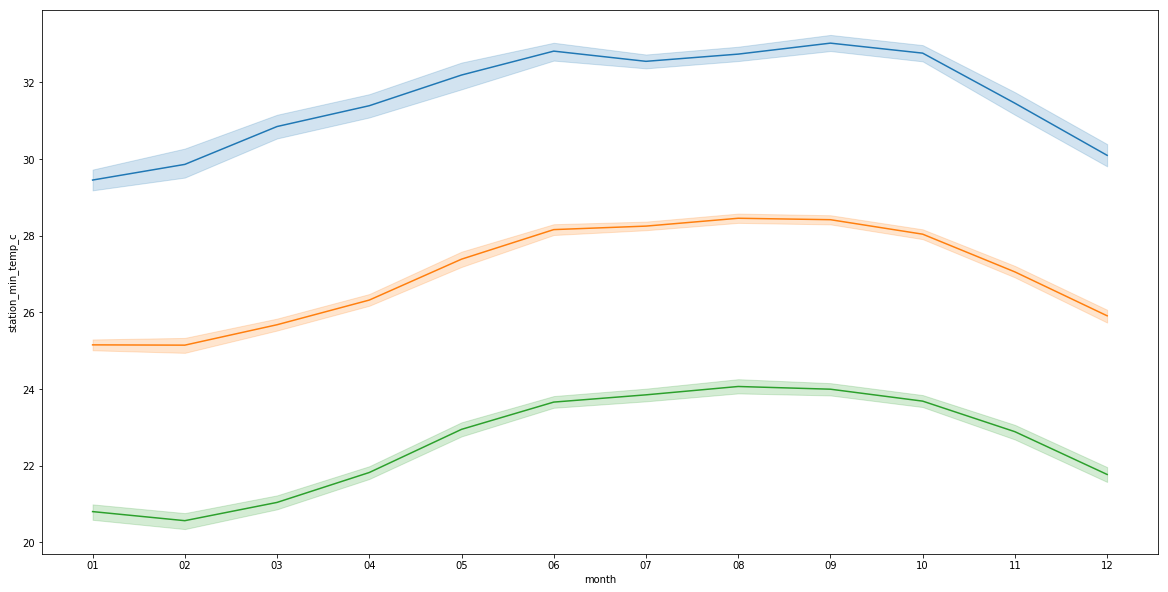

In [177]:
plt.figure(figsize=(20,10))
sns.lineplot(x=train_labels.month,y=train_labels['station_max_temp_c'][train_labels['city']=='sj'])
sns.lineplot(x=train_labels.month,y=train_labels['station_avg_temp_c'][train_labels['city']=='sj'])
sns.lineplot(x=train_labels.month,y=train_labels['station_min_temp_c'][train_labels['city']=='sj'])

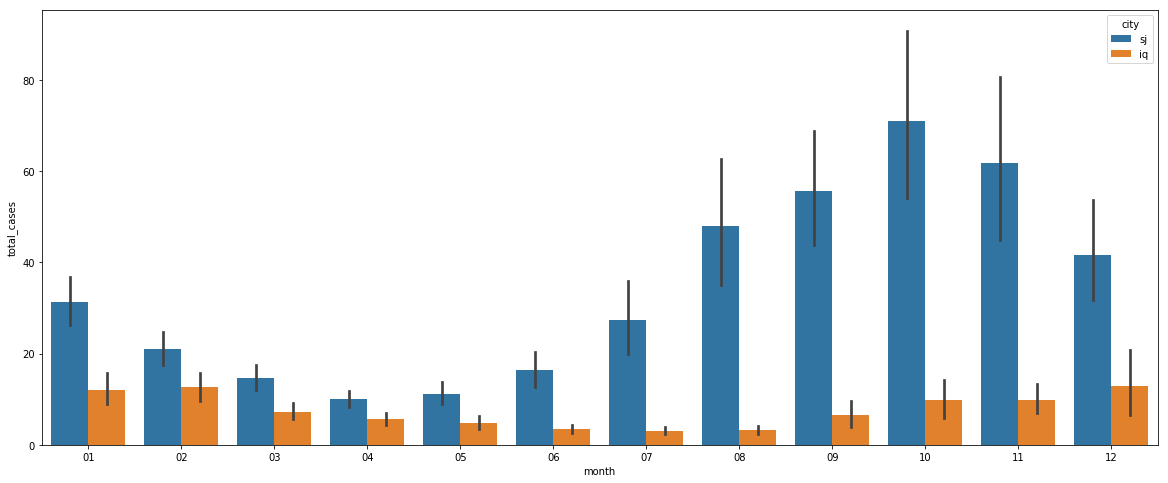

In [178]:
plt.figure(figsize=(20,8))
sns.barplot(x=train_labels['month'], y=train_labels['total_cases'], hue=train_labels['city']);

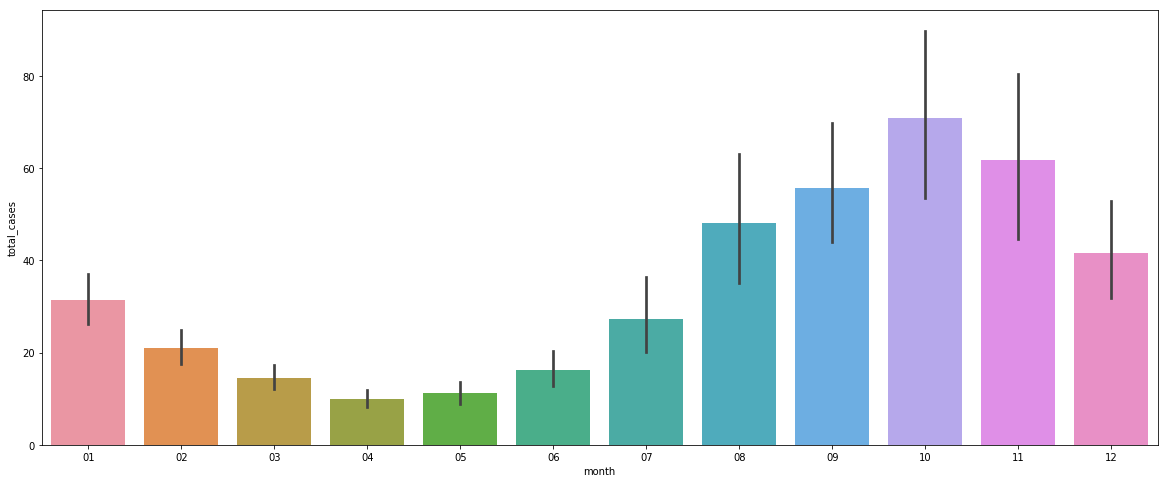

In [152]:
plt.figure(figsize=(20,8))
sns.barplot(x=train_labels['month'][train_labels['city']=='sj'], y=train_labels['total_cases']);

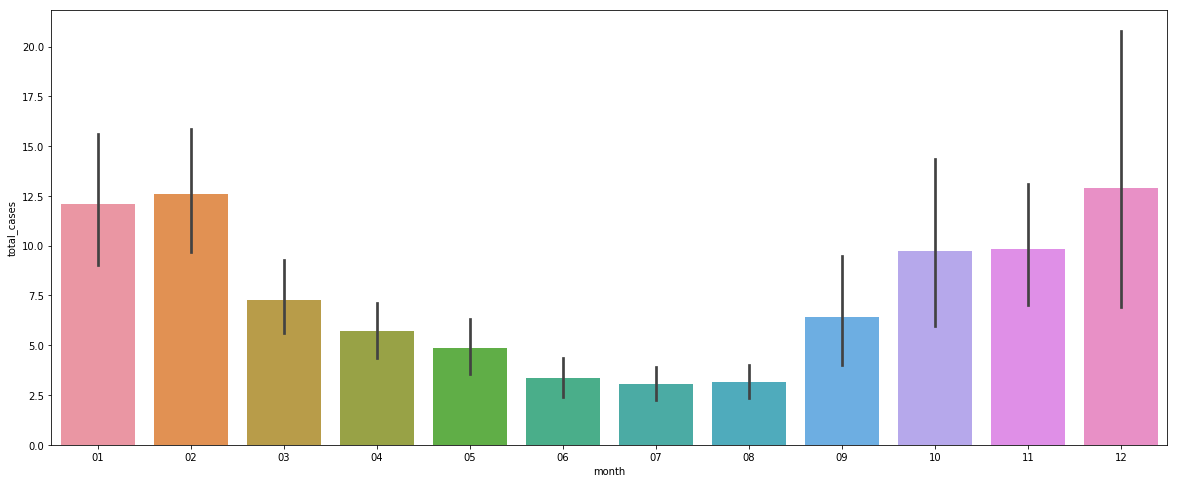

In [206]:
plt.figure(figsize=(20,8))
sns.barplot(x=train_labels['month'][train_labels['city']=='iq'], y=train_labels['total_cases']);

In [233]:
train_labels.dropna(inplace=True)

In [234]:
train_labels.isna().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [235]:
temperatura = pd.DataFrame(train_labels.groupby(['city',
                                                 'year', 
                                                 'month',
                                                 'weekofyear', 
                                                 'ndvi_ne', 
                                                 'ndvi_nw', 
                                                 'ndvi_se', 
                                                 'ndvi_sw', 
                                                 'station_min_temp_c',
                                                 'station_max_temp_c',
                                                 'station_avg_temp_c',
                                                 'reanalysis_air_temp_k']).sum()['total_cases'])

In [216]:
temperatura.reset_index(inplace=True)

In [217]:
temperatura.sample(5)

,city,year,month,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,station_min_temp_c,station_max_temp_c,station_avg_temp_c,reanalysis_air_temp_k,total_cases
1449,sj,2008,03,11,-0.321400,-0.141200,0.110643,0.141014,22.2,28.9,25.328571,297.595714,2
149,iq,2003,05,20,0.245429,0.184700,0.261457,0.268886,22.0,32.5,27.000000,294.922857,1
1305,sj,2005,06,22,-0.014300,-0.004475,0.177800,0.146757,25.0,34.4,28.842857,300.840000,10
92,iq,2002,04,15,0.269829,0.196814,0.202586,0.266286,20.8,31.4,26.300000,296.862857,8
1139,sj,2002,03,13,0.177700,0.316700,0.320386,0.320929,22.2,32.8,26.757143,298.275714,6


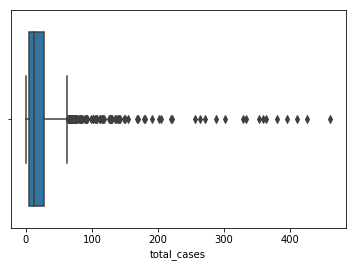

In [218]:
sns.boxplot(data=train_labels, x='total_cases', hue='city')

In [270]:
train_labels['total_cases'] = np.log1p(train_labels['train_labels'])

KeyError: 'train_labels'

In [160]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn import model_selection

In [237]:
X = train_labels.drop(['city','total_cases','week_start_date'],axis=1)
y = train_labels.total_cases
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [238]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

25.3424190691


In [273]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

19.3265526902


In [240]:
gbr = GradientBoostingRegressor(random_state=0, max_depth=6, n_estimators=200)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

20.1943637471


In [244]:
xgb = XGBRegressor(max_depth=6, n_estimators=300)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

19.7432096357


In [242]:
lb = LGBMRegressor(n_estimators=1000, max_depth=10, random_state=0)
lb.fit(X_train,y_train)
y_pred = lb.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

22.1933999968


In [254]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

26.4585046655


In [65]:
train_labels.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'month'],
      dtype='object')

In [114]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 26 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null datetime64[ns]
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysi

In [110]:
temperatura.columns

Index(['city', 'year', 'month', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'station_min_temp_c', 'station_max_temp_c',
       'station_avg_temp_c', 'reanalysis_air_temp_k', 'total_cases'],
      dtype='object')

In [102]:
import shap

In [195]:
temperatura.columns

Index(['city', 'year', 'month', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'station_min_temp_c', 'station_max_temp_c',
       'station_avg_temp_c', 'reanalysis_air_temp_k', 'total_cases'],
      dtype='object')

In [196]:
data = pd.DataFrame(X_train, columns=['year', 'month', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'station_min_temp_c', 'station_max_temp_c',
       'station_avg_temp_c', 'reanalysis_air_temp_k'])

In [197]:
data

,year,month,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,station_min_temp_c,station_max_temp_c,station_avg_temp_c,reanalysis_air_temp_k
0,-1.553904,-0.716473,-0.906482,-0.145055,-0.379717,-0.874595,-1.032357,0.080211,0.118433,-0.270607,-0.978896
1,-0.243949,-0.716473,-0.704998,-3.046741,-0.477762,-1.554750,-1.510318,-0.950445,-1.625800,-1.127417,-0.771545
2,0.504598,-0.132283,-0.167707,-0.841917,-1.478654,-0.864805,-0.321179,1.175283,-0.445878,0.642571,0.836989
3,0.878871,-1.300662,-1.309450,1.734900,0.963091,0.511821,0.934283,1.368531,0.631442,1.082250,-1.181010
4,1.253144,-1.300662,-1.242288,0.722809,0.739381,-0.584757,-0.213592,-0.048621,0.426239,0.608750,-1.157971
5,1.253144,-1.300662,-1.242288,-1.987526,-1.900940,0.544068,0.262197,-0.241869,-2.190110,-1.837667,-0.563148
6,0.130324,0.159812,0.302422,1.765704,1.042395,1.930868,0.904546,-1.787853,0.631442,-0.417167,-1.109798
7,1.627417,-0.424378,-0.503514,0.206843,0.199994,-0.974022,-0.702913,-0.563949,0.580141,0.135250,-1.023926
8,0.317461,1.036096,1.041197,-0.882615,-0.805869,0.508367,0.725290,0.466707,-0.189373,-0.078953,1.468464
9,-0.431085,0.159812,0.235261,-0.925454,-0.375850,1.251577,-0.319843,1.175283,0.118433,0.687666,1.018158


In [198]:
explainer = shap.TreeExplainer(gbr, data=data)
shap_values = explainer.shap_values(data)

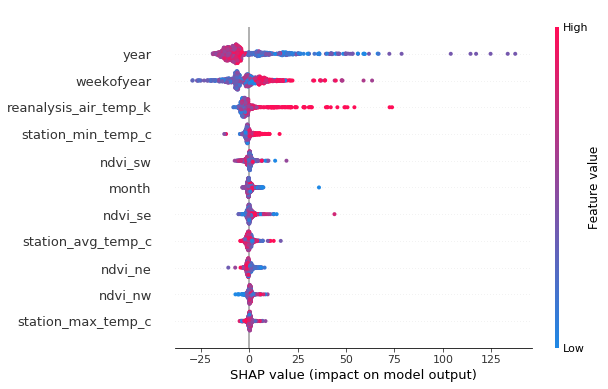

In [280]:
shap.summary_plot(shap_values, data)

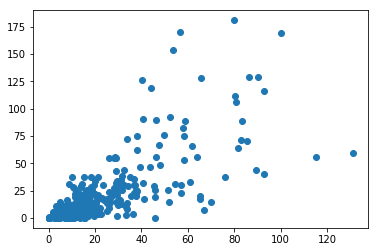

In [263]:
plt.scatter(y_pred, y_test)


In [274]:
y_bla = y_test - y_pred

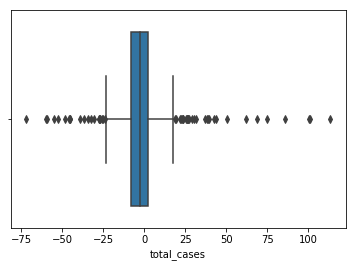

In [275]:
sns.boxplot(y_bla)

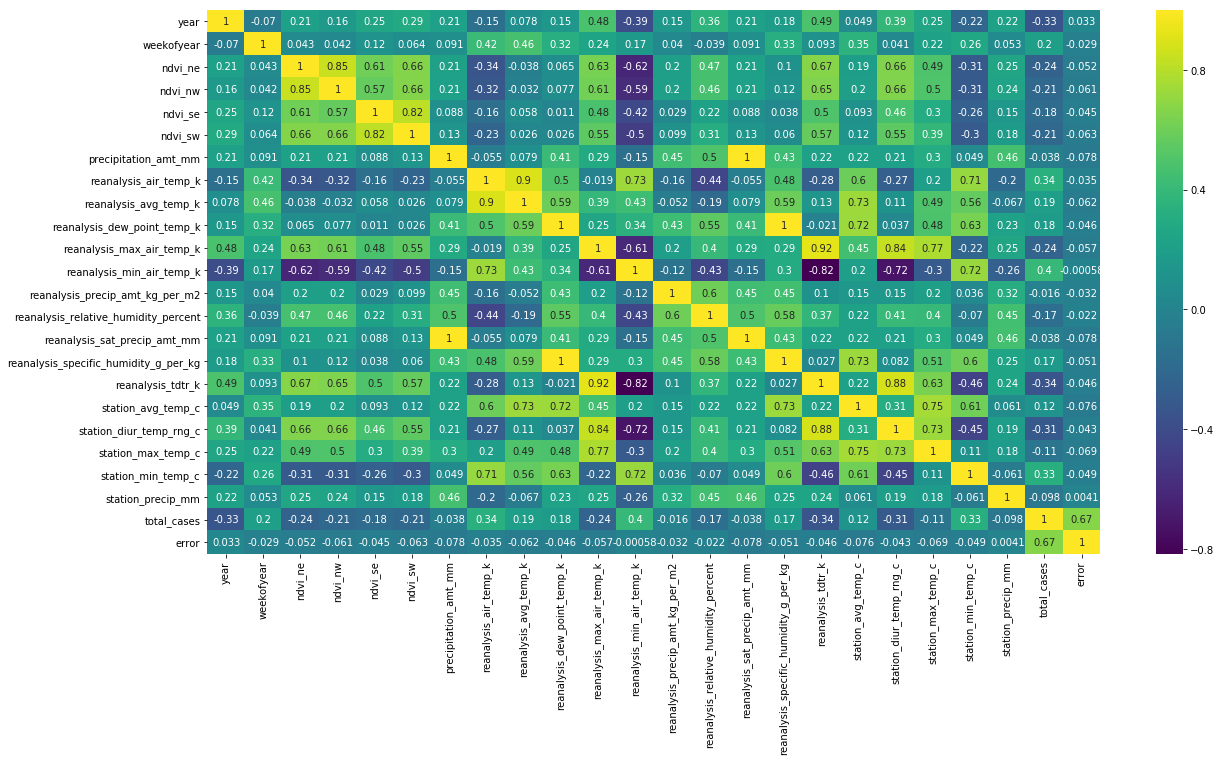

In [279]:
train_labels['error'] = y_bla

plt.figure(figsize=(20,10))
sns.heatmap(train_labels.corr(),cmap='viridis',annot=True)

In [306]:
train_labels[(train_labels.error > -25) | (train_labels.error < 25)]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,month,error
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,05,-3.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,05,-4.3
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4,06,-5.7
10,sj,1990,28,1990-07-09,0.192875,0.082350,0.191943,0.152929,22.27,299.512857,...,17.418571,2.157143,27.557143,7.157143,31.7,21.7,63.7,8,07,-9.2
12,sj,1990,30,1990-07-23,0.150567,0.171700,0.226900,0.214557,16.48,299.558571,...,17.341429,2.071429,28.114286,6.357143,31.7,22.8,32.6,6,07,-15.8
19,sj,1990,37,1990-09-10,0.127967,0.437100,0.123400,0.148283,64.56,300.674286,...,18.777143,2.900000,28.685714,8.057143,33.9,24.4,25.9,20,09,-45.1
20,sj,1990,38,1990-09-17,0.196350,0.182433,0.254829,0.305686,143.73,299.857143,...,17.892857,1.742857,28.242857,8.114286,32.8,23.9,3.3,40,09,-52.8
23,sj,1990,41,1990-10-08,0.171150,0.067550,0.179467,0.157717,51.42,299.857143,...,18.512857,2.571429,28.628571,7.314286,33.3,24.4,57.7,33,10,-27.8
25,sj,1990,43,1990-10-22,0.146200,0.089750,0.128829,0.123929,127.03,298.902857,...,17.750000,1.800000,26.771429,7.628571,32.2,21.7,91.5,37,10,-39.0
33,sj,1990,51,1990-12-17,0.293133,0.266867,0.260857,0.302729,52.45,298.297143,...,15.954286,2.871429,25.714286,6.585714,30.6,21.1,19.8,26,12,-20.1


In [307]:
train_labels['reanalysis_air_temp_C'] = train_labels['reanalysis_air_temp_k']-273.15

In [308]:
train_labels.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,month,error,reanalysis_air_temp_C
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,04,NaN,24.422857
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,05,-3.6,25.061429
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,05,-4.3,25.631429
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,05,NaN,25.837143
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,05,NaN,26.368571


In [278]:
temperatura.head()

total_cases  \
city year month weekofyear ndvi_ne  ndvi_nw  ndvi_se  ndvi_sw  station_min_temp_c station_max_temp_c station_avg_temp_c reanalysis_air_temp_k                
iq   2000 07    26         0.192886 0.132257 0.340886 0.247200 20.7               32.5               26.400000          296.740000                       0   
                27         0.216833 0.276100 0.289457 0.241657 20.8               34.0               26.900000          296.634286                       0   
                28         0.176757 0.173129 0.204114 0.128014 20.7               33.0               26.800000          296.415714                       0   
                29         0.227729 0.145429 0.254200 0.200314 14.7               31.5               25.766667          295.357143                       0   
                30         0.328643 0.322129 0.254371 0.361043 19.1               33.3               26.600000          296.432857                       0   

                                                                                                                                               error  
city year month weekofyear ndvi_ne  ndvi_nw  ndvi_se  ndvi_sw  station_min_temp_c station_max_temp_c station_avg_temp_c reanalysis_air_temp_k         
iq   2000 07    26         0.192886 0.132257 0.340886 0.247200 20.7               32.5               26.400000          296.740000               NaN  
                27         0.216833 0.276100 0.289457 0.241657 20.8               34.0               26.900000          296.634286               NaN  
                28         0.176757 0.173129 0.204114 0.128014 20.7               33.0               26.800000          296.415714               NaN  
                29         0.227729 0.145429 0.254200 0.200314 14.7               31.5               25.766667          295.357143               NaN  
                30         0.328643 0.322129 0.254371 0.361043 19.1               33.3               26.600000          296.432857               NaN

In [310]:
train_labels.dtypes

city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

In [312]:
X = train_labels.drop(['city','total_cases','week_start_date','reanalysis_air_temp_k','error'],axis=1)
y = train_labels.total_cases
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [319]:
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

19.7280782452
